In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd 
import numpy as np
import sklearn 
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import scipy as sp 
import IPython
from IPython import display 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
-------------------------


In [149]:
# Importing the training data set 
train_1 = pd.read_csv("C:/Users/Sameera/Downloads/train_HK6lq50.csv")
print (train_1.info()) 
train_1.sample(10)

#Finding the missing values
train_1.isnull().sum()

#Missing Value Treatment
mean_1 = train_1['age'].mean()
train_1['age']=train_1['age'].fillna(mean_1) 

mean_2 = train_1['trainee_engagement_rating'].mean()
train_1['trainee_engagement_rating']=train_1['trainee_engagement_rating'].fillna(mean_2) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB
None
            

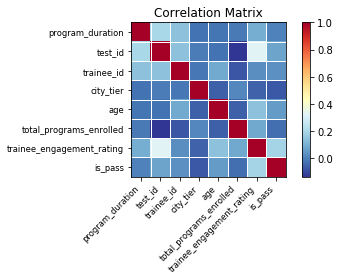

Text(0.5, 1.0, 'Pass Value (1 = Pass, 0 = Fail)')

<Figure size 432x288 with 0 Axes>

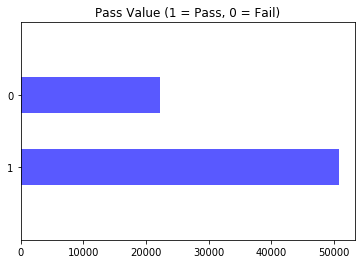

In [145]:
#Correlation matrix between variables
corr = train_1.corr()
print(corr)

#Plotting the correlation matrix
from statsmodels import api as sm
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

# Plotting the number of students passed variable
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
train_1.is_pass.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(train_1.is_pass.value_counts())) 
plt.title("Pass Value (1 = Pass, 0 = Fail)")

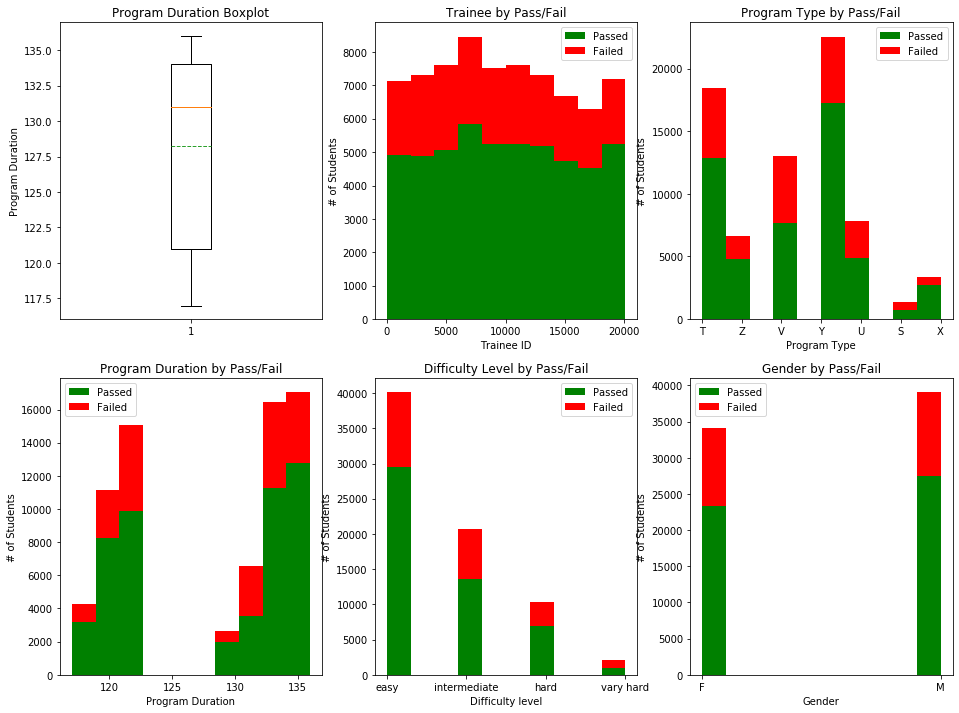

In [3]:
#Visualizing the variables and exploring the relation between target and rest of the variables

plt.figure(figsize=[16,12])


plt.subplot(231)
plt.boxplot(x=train_1['program_duration'], showmeans = True, meanline = True)
plt.title('Program Duration Boxplot')
plt.ylabel('Program Duration')

plt.subplot(232)
plt.hist(x = [train_1[train_1['is_pass']==1]['trainee_id'], train_1[train_1['is_pass']==0]['trainee_id']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Trainee by Pass/Fail')
plt.xlabel('Trainee ID')
plt.ylabel('# of Students')
plt.legend()


plt.subplot(233)
plt.hist(x = [train_1[train_1['is_pass']==1]['program_type'], train_1[train_1['is_pass']==0]['program_type']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Program Type by Pass/Fail')
plt.xlabel('Program Type')
plt.ylabel('# of Students')
plt.legend()

plt.subplot(234)
plt.hist(x = [train_1[train_1['is_pass']==1]['program_duration'], train_1[train_1['is_pass']==0]['program_duration']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Program Duration by Pass/Fail')
plt.xlabel('Program Duration')
plt.ylabel('# of Students')
plt.legend()

plt.subplot(235)
plt.hist(x = [train_1[train_1['is_pass']==1]['difficulty_level'], train_1[train_1['is_pass']==0]['difficulty_level']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Difficulty Level by Pass/Fail')
plt.xlabel('Difficulty level')
plt.ylabel('# of Students')
plt.legend()

plt.subplot(236)
plt.hist(x = [train_1[train_1['is_pass']==1]['gender'], train_1[train_1['is_pass']==0]['gender']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Gender by Pass/Fail')
plt.xlabel('Gender')
plt.ylabel('# of Students')
plt.legend()







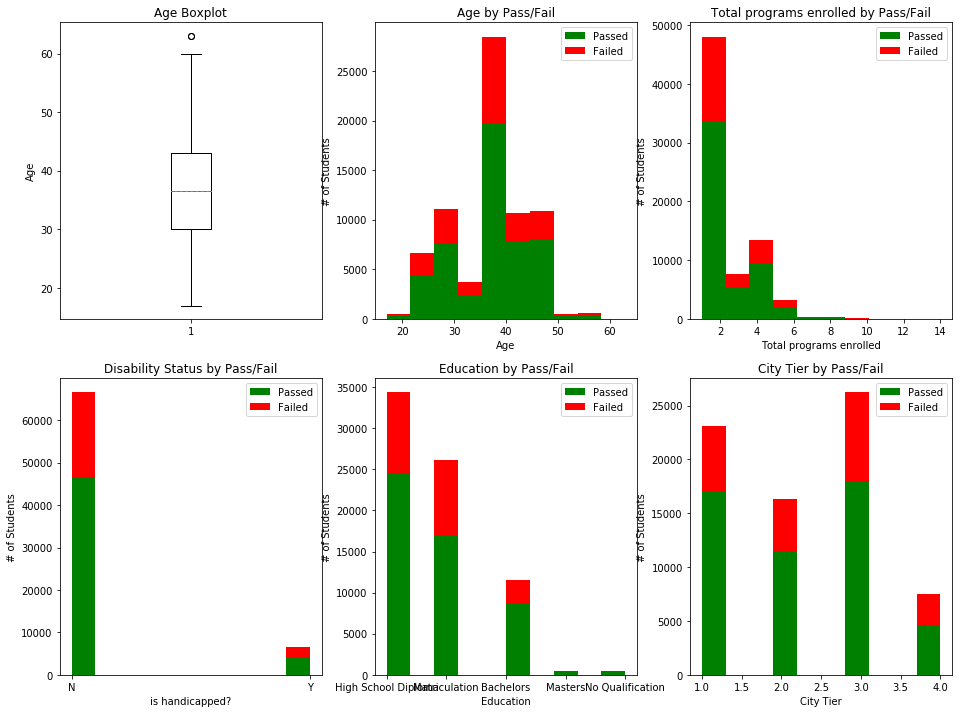

In [114]:
#Visualizing the variables and exploring the relation between target and rest of the variables

plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=train_1['age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age')


plt.subplot(232)
plt.hist(x = [train_1[train_1['is_pass']==1]['age'], train_1[train_1['is_pass']==0]['age']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Age by Pass/Fail')
plt.xlabel('Age')
plt.ylabel('# of Students')
plt.legend()


plt.subplot(233)
plt.hist(x = [train_1[train_1['is_pass']==1]['total_programs_enrolled'], train_1[train_1['is_pass']==0]['total_programs_enrolled']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Total programs enrolled by Pass/Fail')
plt.xlabel('Total programs enrolled')
plt.ylabel('# of Students')
plt.legend()


plt.subplot(234)
plt.hist(x = [train_1[train_1['is_pass']==1]['is_handicapped'], train_1[train_1['is_pass']==0]['is_handicapped']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Disability Status by Pass/Fail')
plt.xlabel('is handicapped?')
plt.ylabel('# of Students')
plt.legend()

plt.subplot(235)
plt.hist(x = [train_1[train_1['is_pass']==1]['education'], train_1[train_1['is_pass']==0]['education']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Education by Pass/Fail')
plt.xlabel('Education')
plt.ylabel('# of Students')
plt.legend()

plt.subplot(236)
plt.hist(x = [train_1[train_1['is_pass']==1]['city_tier'], train_1[train_1['is_pass']==0]['city_tier']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('City Tier by Pass/Fail')
plt.xlabel('City Tier')
plt.ylabel('# of Students')
plt.legend()


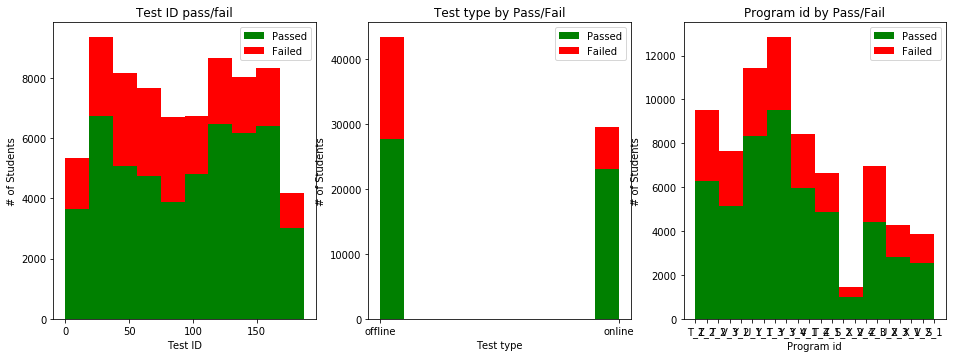

In [128]:
#Visualizing the variables and exploring the relation between target and rest of the variables

plt.figure(figsize=[16,12])


plt.subplot(234)
plt.hist(x = [train_1[train_1['is_pass']==1]['test_id'], train_1[train_1['is_pass']==0]['test_id']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Test ID pass/fail')
plt.xlabel('Test ID')
plt.ylabel('# of Students')
plt.legend()

plt.subplot(235)
plt.hist(x = [train_1[train_1['is_pass']==1]['test_type'], train_1[train_1['is_pass']==0]['test_type']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Test type by Pass/Fail')
plt.xlabel('Test type')
plt.ylabel('# of Students')
plt.legend()

plt.subplot(236)
plt.hist(x = [train_1[train_1['is_pass']==1]['program_id'], train_1[train_1['is_pass']==0]['program_id']], 
         stacked=True, color = ['g','r'],label = ['Passed','Failed'])
plt.title('Program id by Pass/Fail')
plt.xlabel('Program id')
plt.ylabel('# of Students')
plt.legend()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB
None
<class 'pand

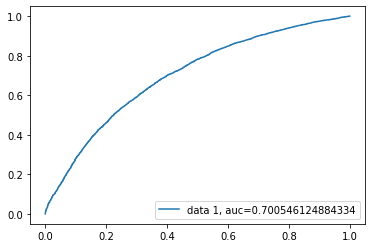

Optimization terminated successfully.
         Current function value: 0.554354
         Iterations 8
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.099     
Dependent Variable:    y                 AIC:               60899.7210
Date:                  2020-04-24 15:55  BIC:               61238.3975
No. Observations:      54860             Log-Likelihood:    -30412.   
Df Model:              37                LL-Null:           -33766.   
Df Residuals:          54822             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
     Coef.     Std.Err.      z     P>|z|      [0.025         0.975]   
----------------------------------------------------------------------
x1   0.0027        0.0010   2.8074 0.0050         0.0008        0.0045
x2 

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
39431,V_4,V,122,74,online,easy,983,M,Bachelors,1,36.494033,4,N,1.0,1
71925,V_3,V,131,82,offline,intermediate,11687,M,High School Diploma,3,36.494033,3,Y,4.0,1
32339,T_4,T,120,15,offline,intermediate,7444,F,Matriculation,3,25.000000,2,N,1.0,0
47376,Z_3,Z,130,167,online,easy,4192,F,High School Diploma,2,48.000000,1,N,4.0,1
41365,Z_1,Z,136,187,online,easy,14938,F,High School Diploma,3,36.494033,1,N,1.0,1
30075,T_4,T,120,14,offline,intermediate,5816,F,Matriculation,3,45.000000,4,Y,1.0,0
20203,Y_3,Y,135,131,online,easy,4053,M,High School Diploma,1,42.000000,2,N,4.0,1
63555,T_2,T,117,35,offline,intermediate,18624,F,High School Diploma,3,36.494033,4,N,1.0,0
25094,S_2,S,134,0,offline,easy,19540,M,Bachelors,1,58.000000,2,N,2.0,1
27502,Y_3,Y,135,133,online,easy,18802,F,High School Diploma,2,44.000000,3,N,5.0,1


In [157]:
#Droppping columns that are not required
train_1.drop(['id'], axis = 1, inplace = True)

#Dummyfying the categorical variables
train_2 = pd.get_dummies(train_1, columns = [ 'program_id','program_type','test_type','difficulty_level','gender','education','is_handicapped'], drop_first = True)

print(train_2.info())
type(train_2)

#Separating the dependant and the independant variables
X = train_2.loc[:, train_2.columns != 'is_pass']
y = train_2.loc[:, train_2.columns == 'is_pass']

#Converting the datasets into numpy arrays 
array_X = pd.DataFrame(X).to_numpy()
array_y = pd.DataFrame(y).to_numpy()

#Splitting the dataset into training and test dataset
X_train,X_test,y_train,y_test=train_test_split(array_X,array_y,test_size=0.25,random_state=0)

#Fitting the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

#Applying the model on the test dataset 
y_pred=logreg.predict(X_test)

#alculating the accuracy etc. through confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

#Plotting AUC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Summary of statistics models
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())


In [199]:
#Importing the test dataset
test_1 = pd.read_csv("C:/Users/Sameera/Downloads/test_wF0Ps6O.csv")

#Finding the missing values
test_1.isnull().sum()

#Missing Value Treatment
mean_1_test = test_1['age'].mean()
test_1['age']=test_1['age'].fillna(mean_1_test) 

mean_2_test = test_1['trainee_engagement_rating'].mean()
test_1['trainee_engagement_rating']=test_1['trainee_engagement_rating'].fillna(mean_2_test) 

#Dummyfing the categorical variables
test_2 = pd.get_dummies(test_1, columns = ['program_id', 'program_type','test_type','difficulty_level','gender','education','is_handicapped'], drop_first = True)

#Dropping the variables not required
test_2.drop(['id'], axis = 1, inplace = True)

#Converting dataset into numpy array
array_X_test_2 = pd.DataFrame(test_2).to_numpy()
type(array_X_test_2)

#Applying the logistic model
is_pass_test=logreg.predict(array_X_test_2)

#Convering into dataframe with required column name
is_pass_test_col = pd.DataFrame(data = is_pass_test, columns = ['is_pass'])

#Subsettind id column from test dataset for final submission
id_1 = pd.DataFrame(test_1['id'])

#Creating the final submission file
submit = pd.concat([id_1, is_pass_test_col], axis=1)

#Copying and saving the csv file in the desired location
submit.to_csv("C:/Users/Sameera/Downloads/submit.csv")








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 44 columns):
program_duration                 31349 non-null int64
test_id                          31349 non-null int64
trainee_id                       31349 non-null int64
city_tier                        31349 non-null int64
age                              31349 non-null float64
total_programs_enrolled          31349 non-null int64
trainee_engagement_rating        31349 non-null float64
program_id_S_2                   31349 non-null uint8
program_id_T_1                   31349 non-null uint8
program_id_T_2                   31349 non-null uint8
program_id_T_3                   31349 non-null uint8
program_id_T_4                   31349 non-null uint8
program_id_U_1                   31349 non-null uint8
program_id_U_2                   31349 non-null uint8
program_id_V_1                   31349 non-null uint8
program_id_V_2                   31349 non-null uint8
program_id_V_3         